# Scenarios

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import linear_model
import pickle
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import Image
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import requests
import gzip

## Data

### COVID-19 data

Source: [Our World in Data](https://ourworldindata.org/coronavirus)

In [10]:
#url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
#filename = 'data/world_' + url.split("/")[-1]

#with open(filename, "wb") as f:
#    r = requests.get(url)
#    f.write(r.content)

In [11]:
filename = 'data/world_owid-covid-data_05_17.csv'

In [12]:
df_WORLD = pd.read_csv(filename)
df_WORLD = df_WORLD[df_WORLD.location != 'Hong Kong']

In [13]:
df_WORLD['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

### Population data

Data source: https://data.worldbank.org/indicator/SP.POP.TOTL

In [14]:
df_WORLD_pop = pd.read_csv('data/world_population.csv', header= 2)

### COVID-19 data for countries with population between 5 and 100 millions

In [15]:
df_WORLD_pop = df_WORLD_pop[ (df_WORLD_pop['2018'] >= 5000000) &
                             (df_WORLD_pop['2018'] < 50000000)]

df_WORLD = df_WORLD[df_WORLD['iso_code'].isin(df_WORLD_pop['Country Code'])]

countries = df_WORLD['location'].unique()

## Local gradient $\beta$ for a window of $d$ days

In [16]:
def rolling_beta(X, y, idx, window= 5):

    assert len(X) == len(y)

    out_dates = []
    out_beta = []

    model_ols = linear_model.LinearRegression()

    for iStart in range(0, len(X)-window):        
        iEnd = iStart + window

        model_ols.fit(X[iStart:iEnd], y[iStart:iEnd])

        # Store output
        out_dates.append(idx[iEnd])
        out_beta.append(model_ols.coef_[0][0])
      
    return pd.DataFrame({'beta': out_beta}, index= out_dates)

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


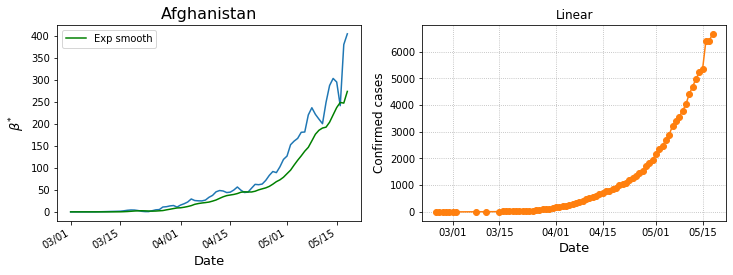

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


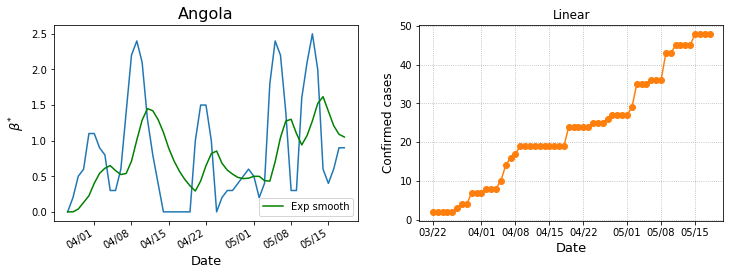

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


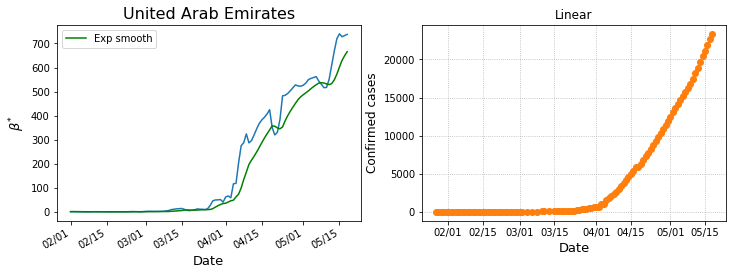

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


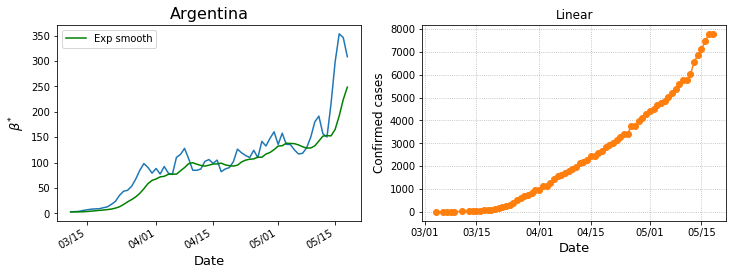

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


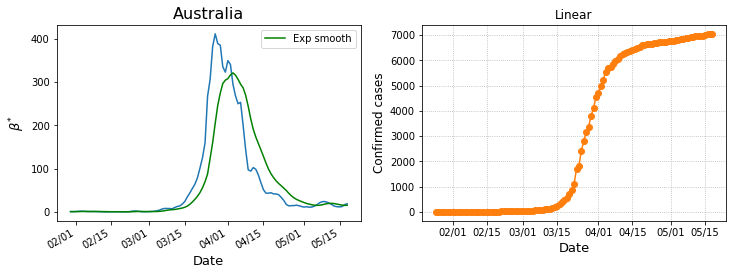

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


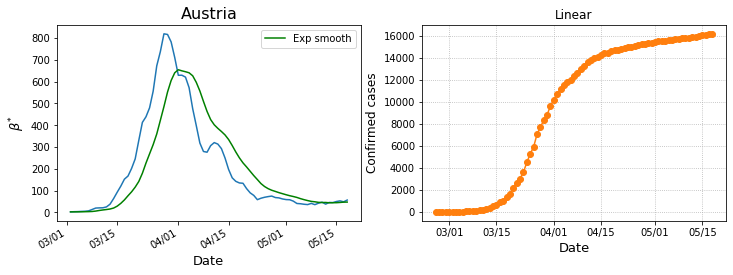

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


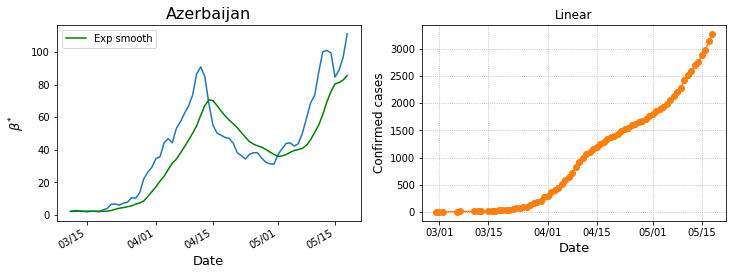

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


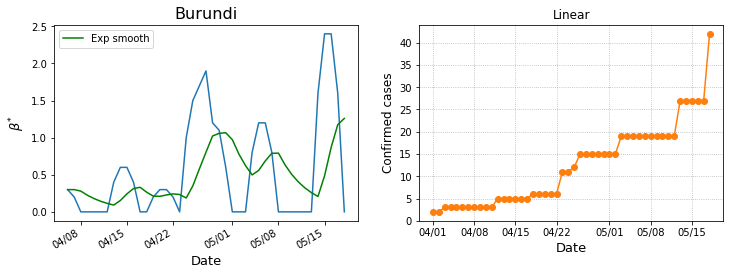

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


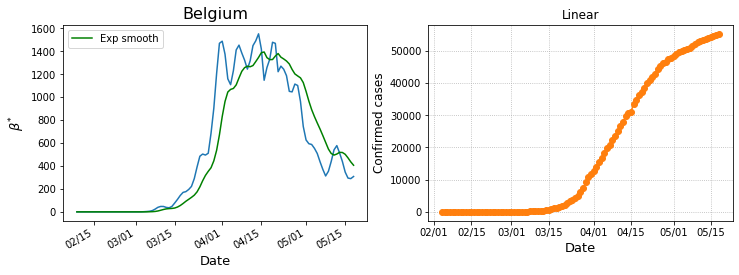

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


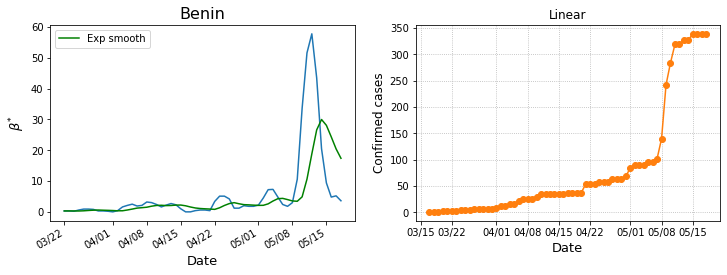

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


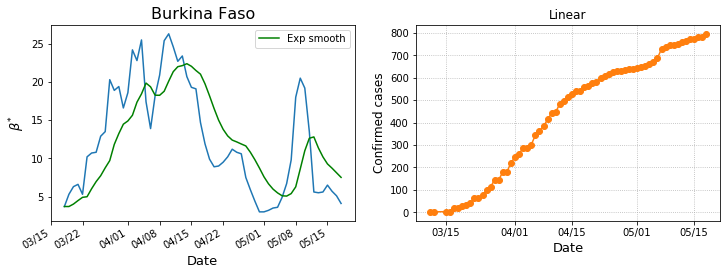

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


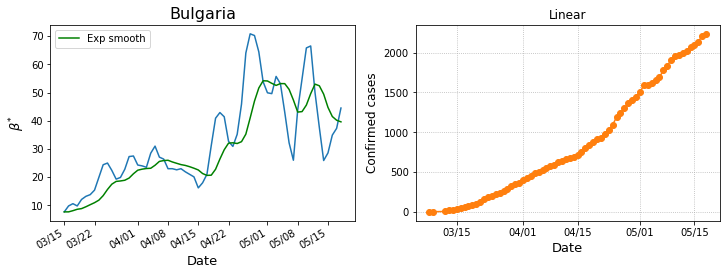

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


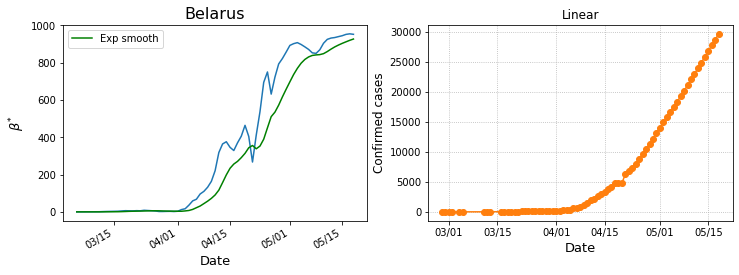

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


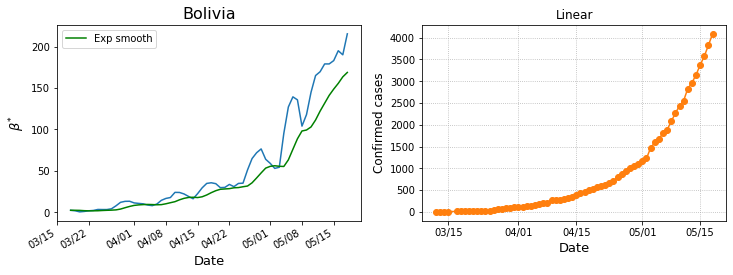

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


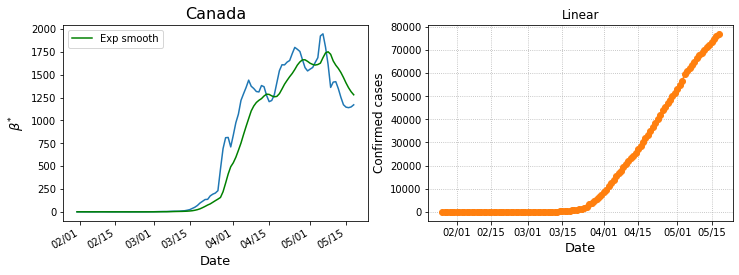

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


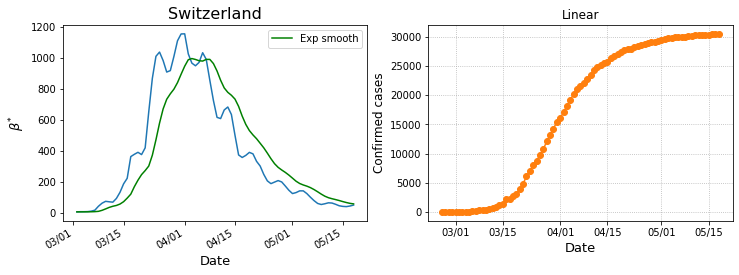

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


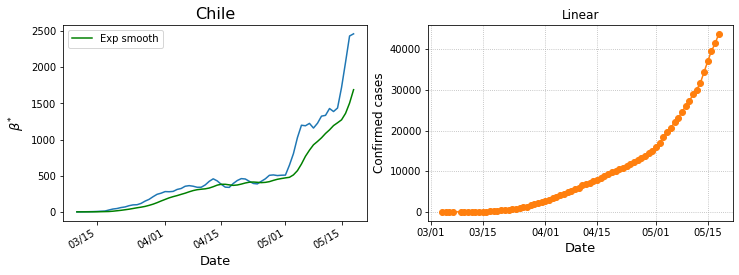

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


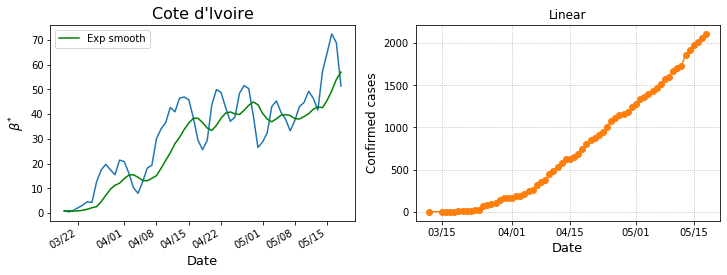

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


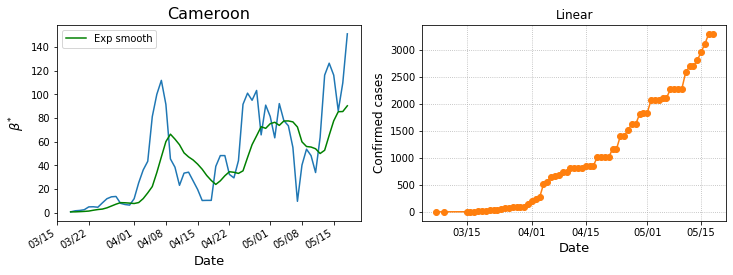

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


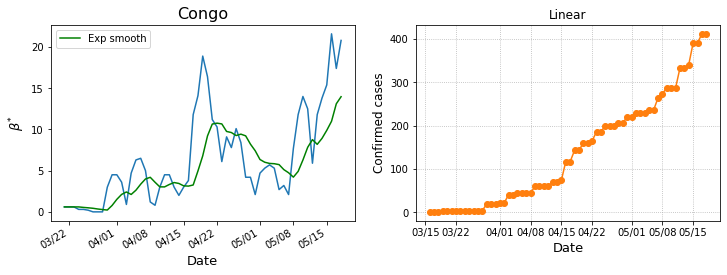

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


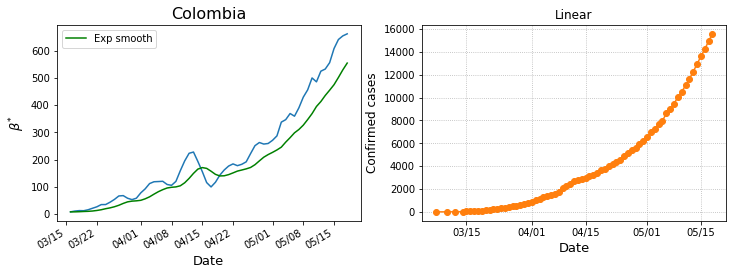

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


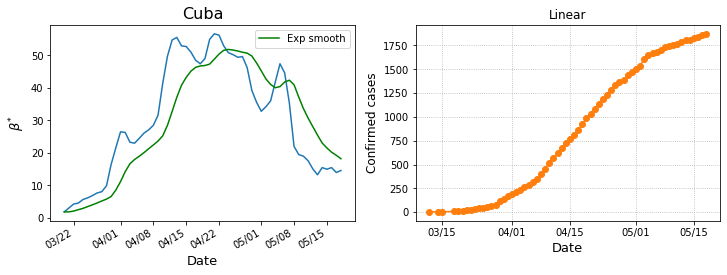

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


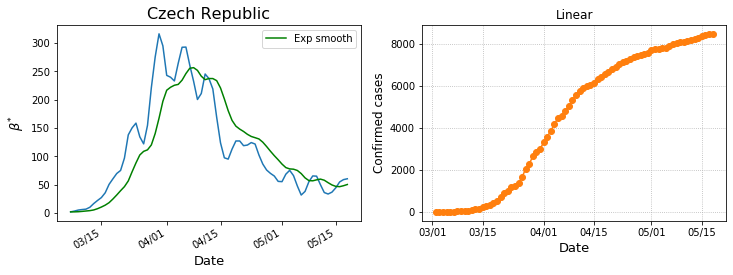

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


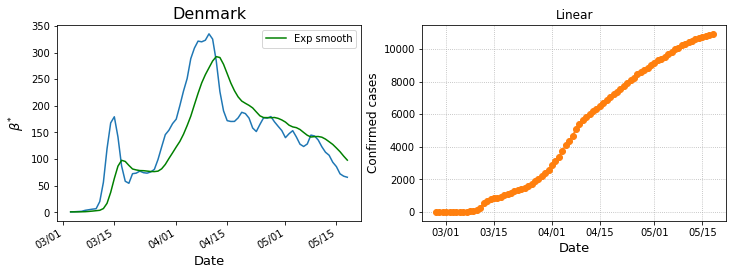

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


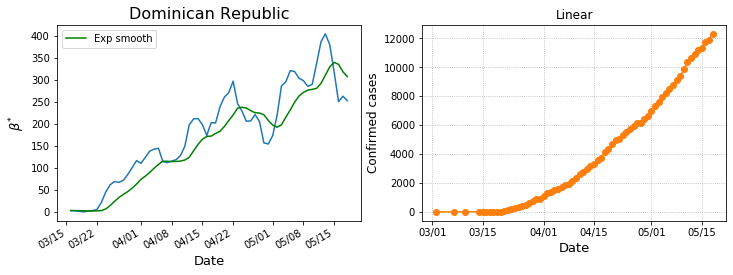

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


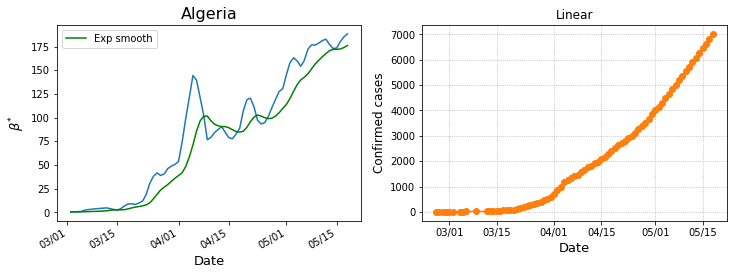

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


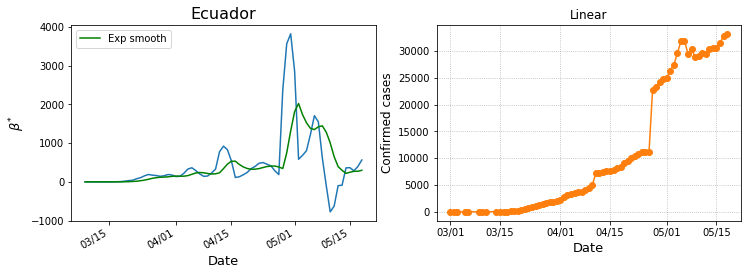

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


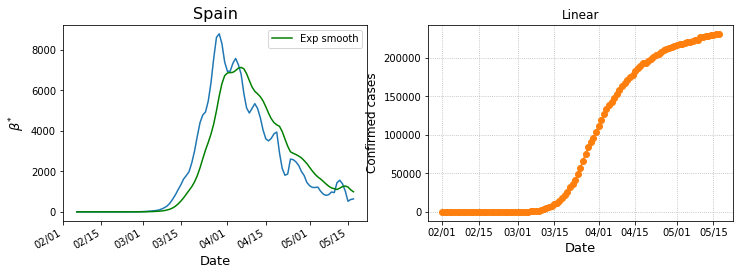

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


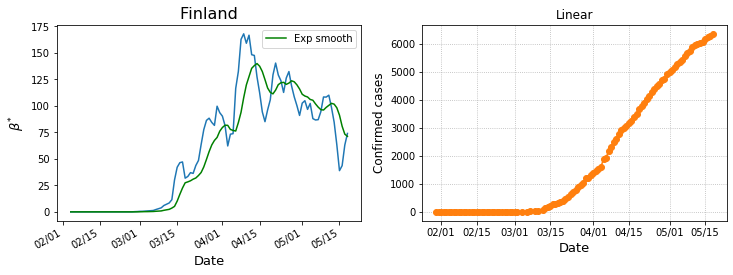

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


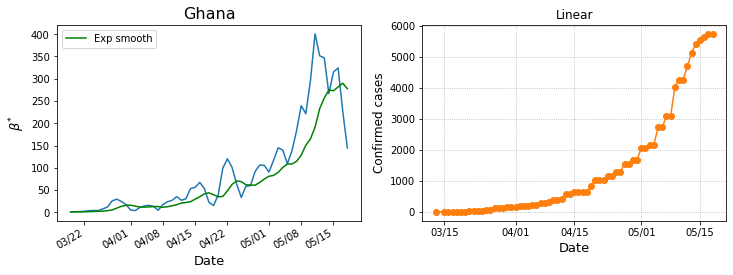

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


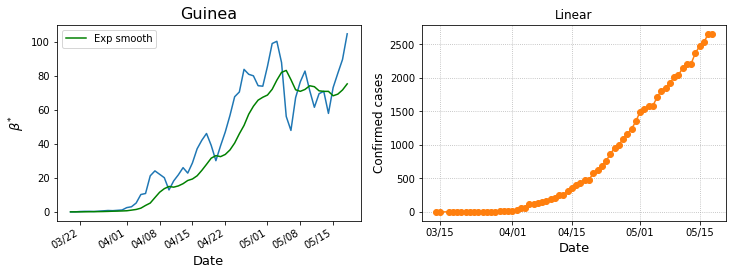

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


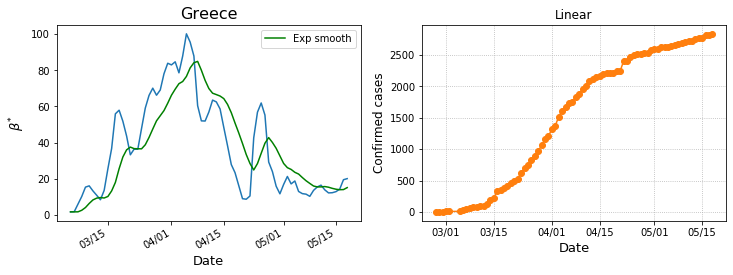

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


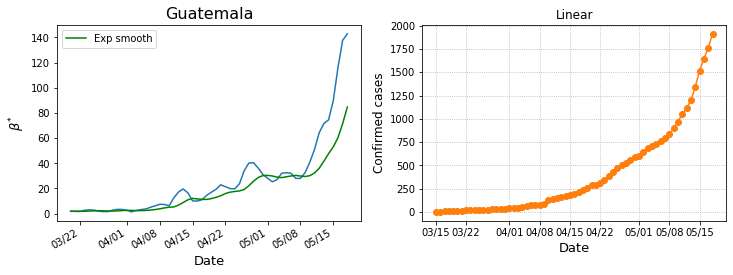

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


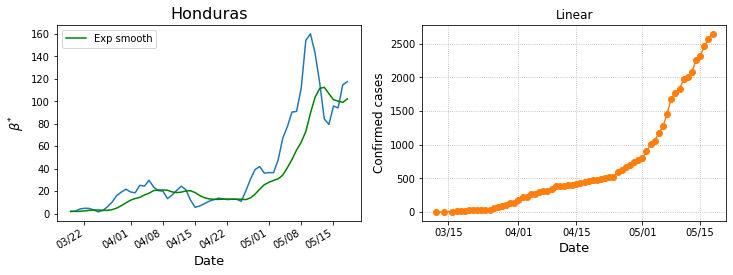

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


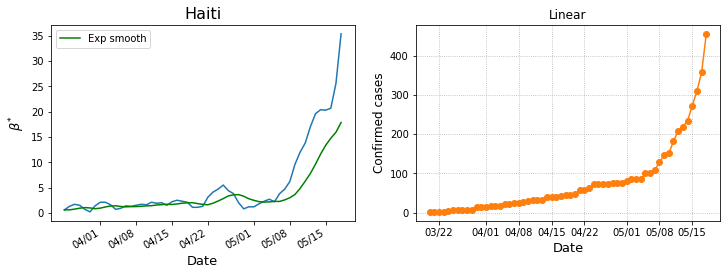

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


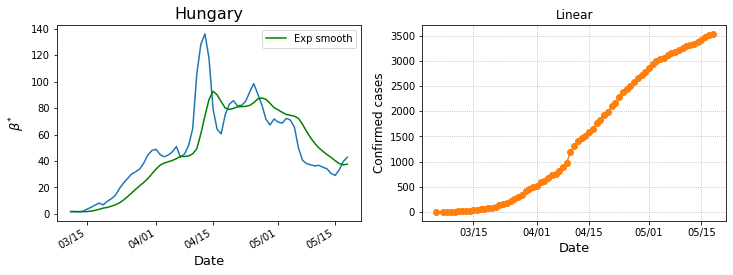

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


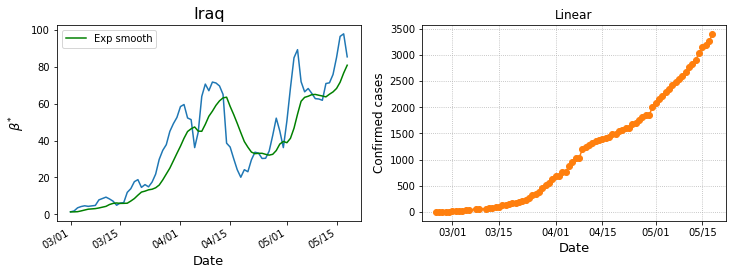

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


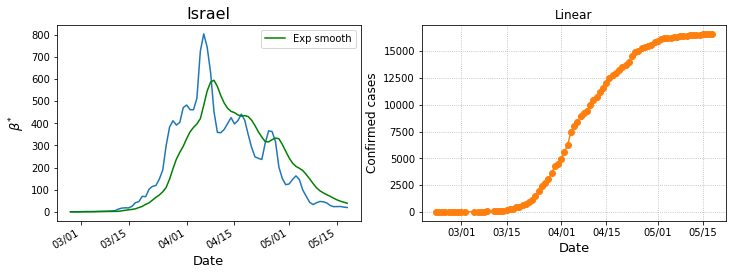

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


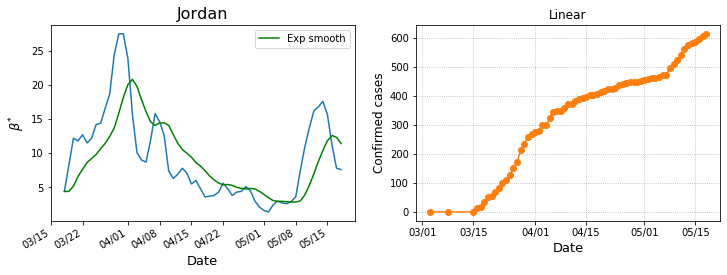

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


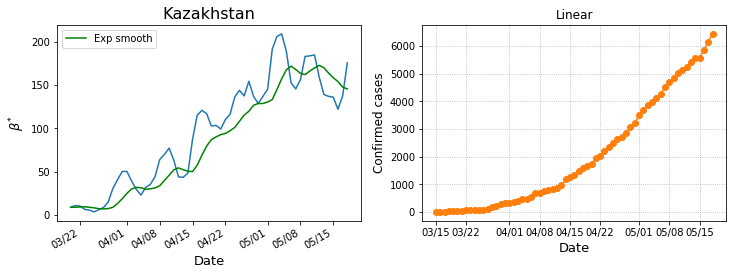

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


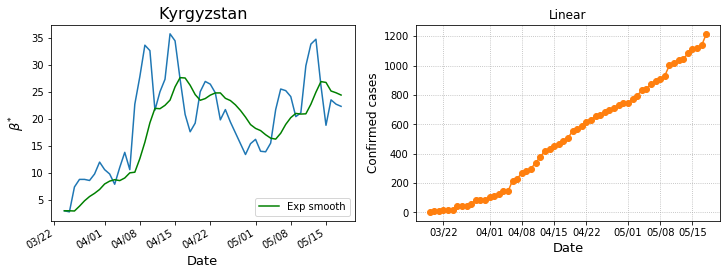

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


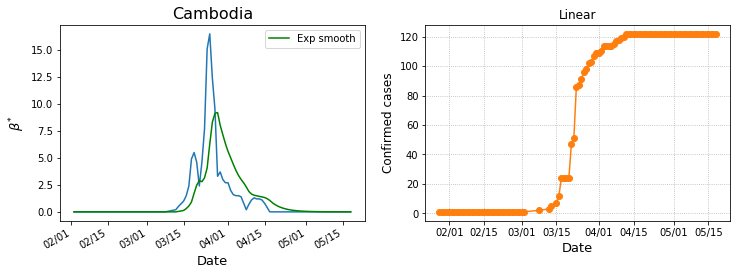

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


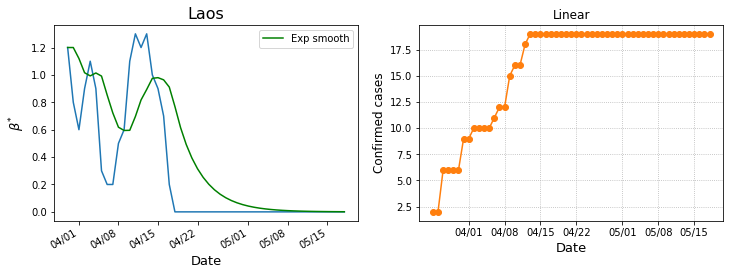

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


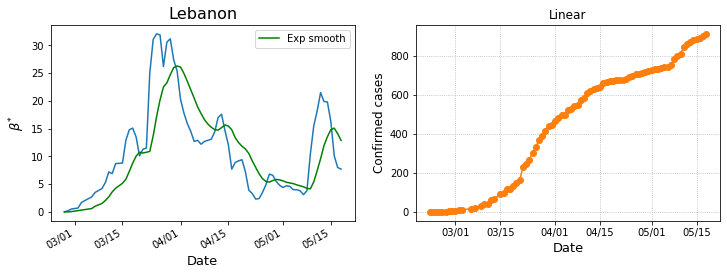

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


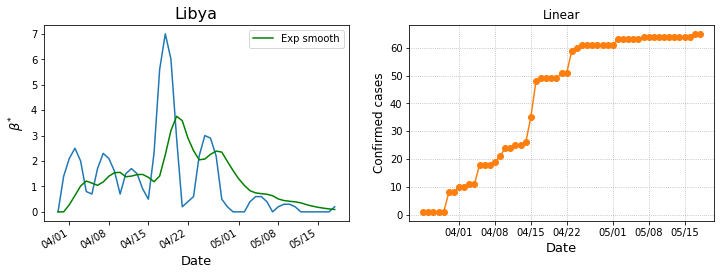

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


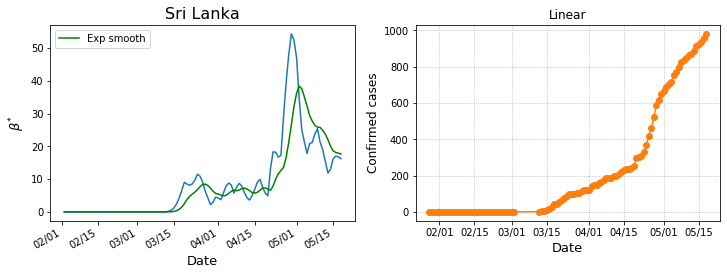

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


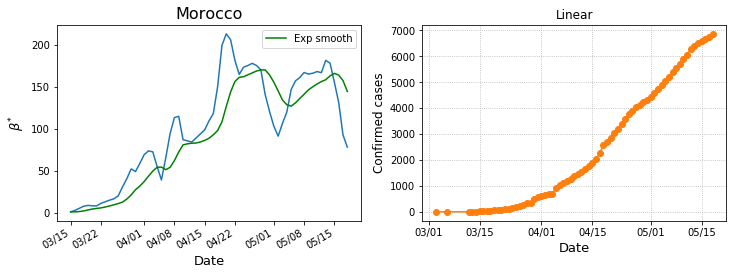

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


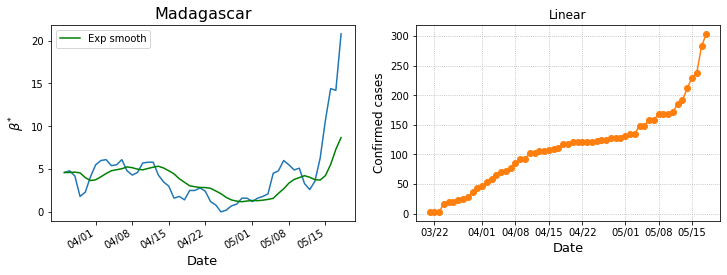

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


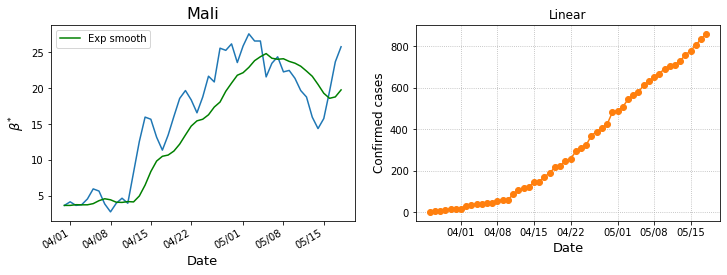

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


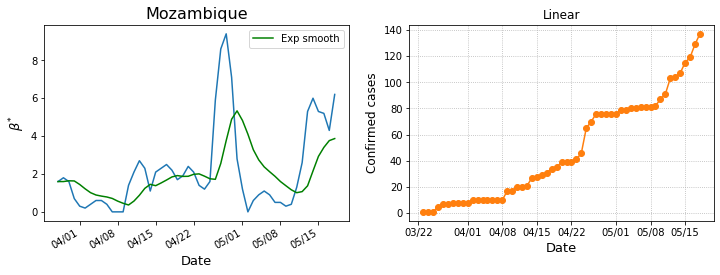

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


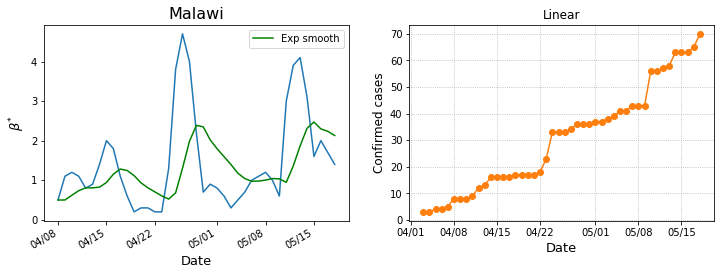

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


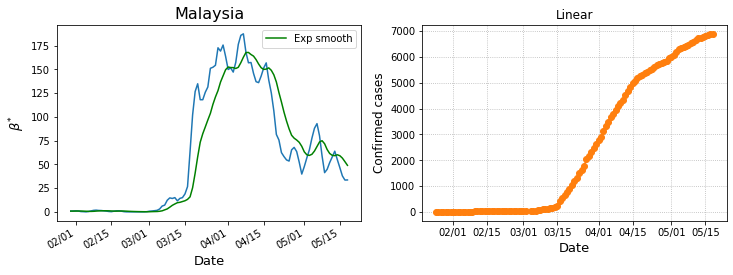

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


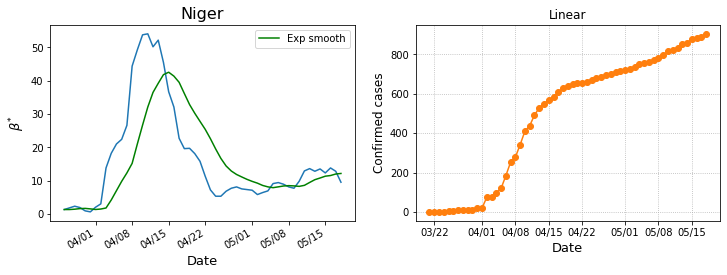

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


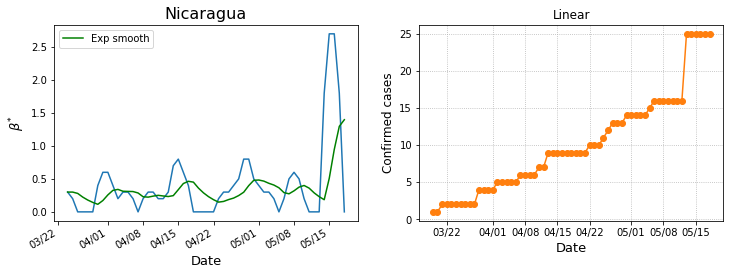

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


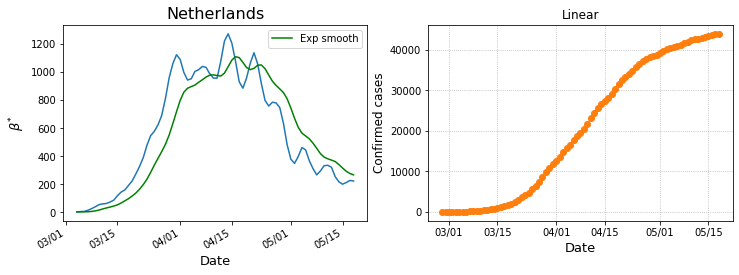

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


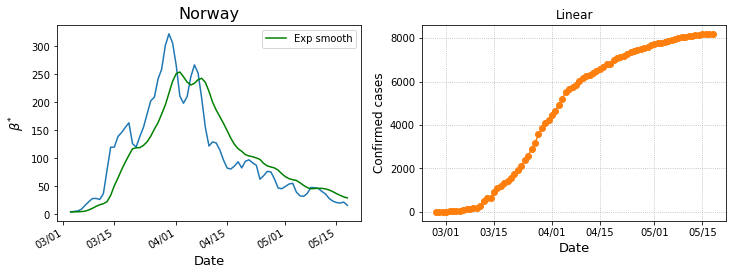

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


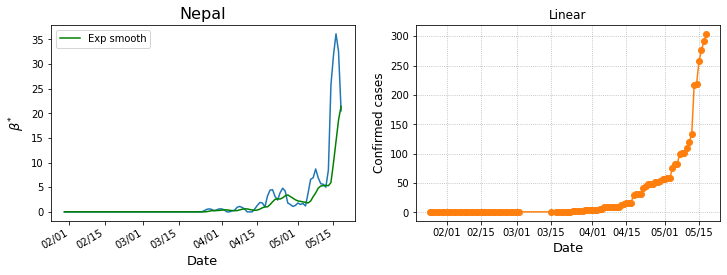

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


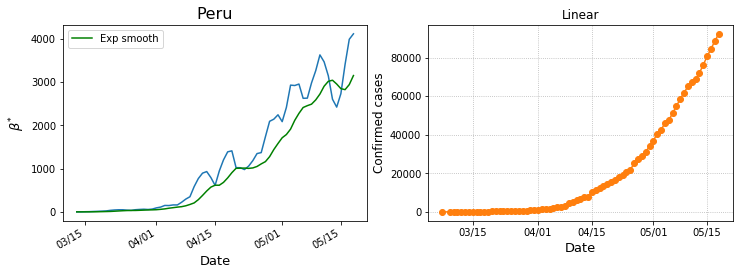

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


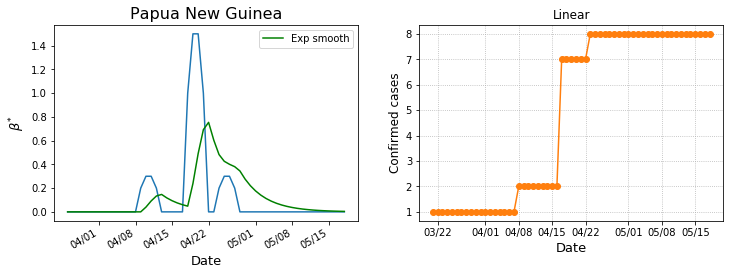

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


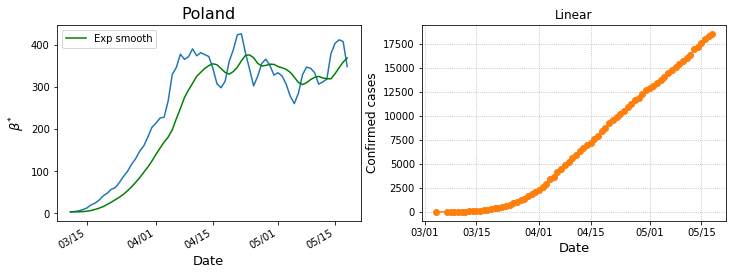

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


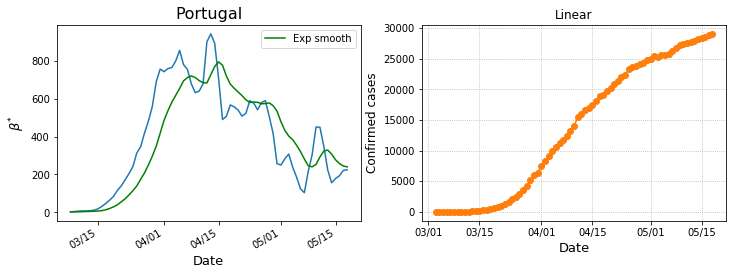

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


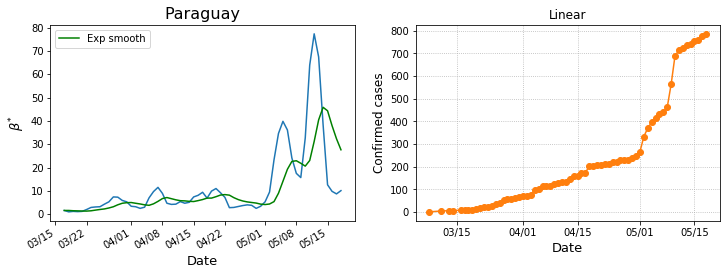

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


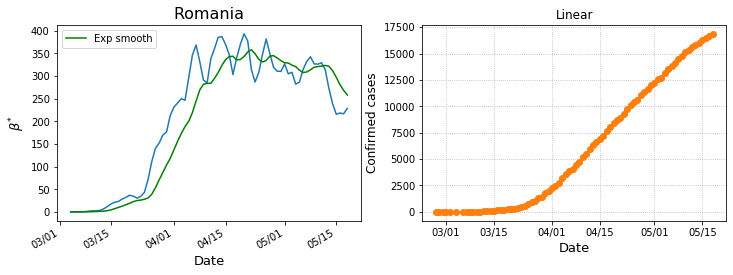

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


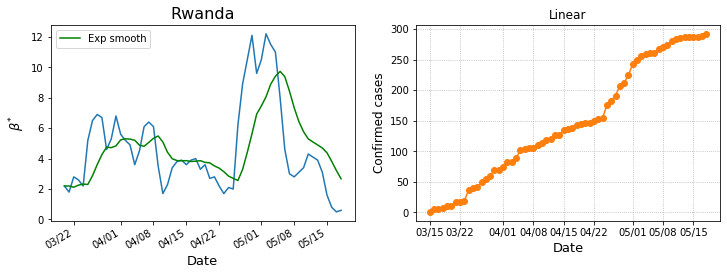

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


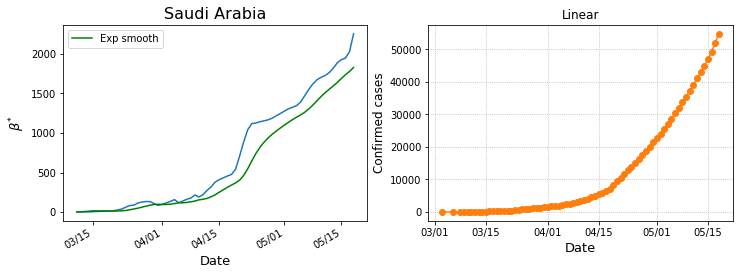

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


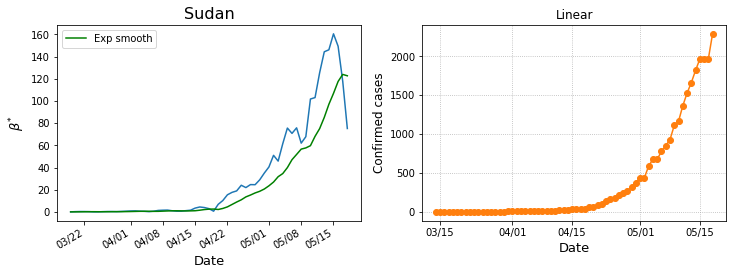

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


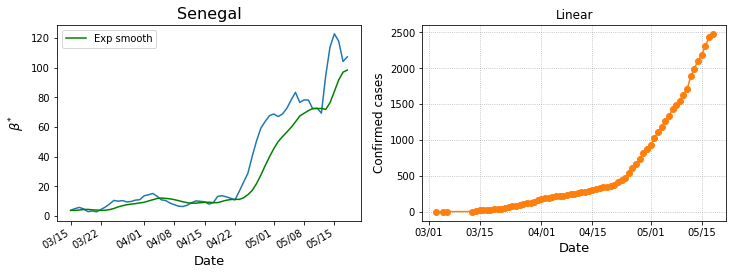

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


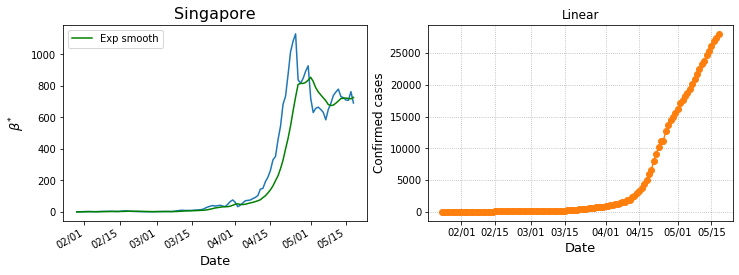

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


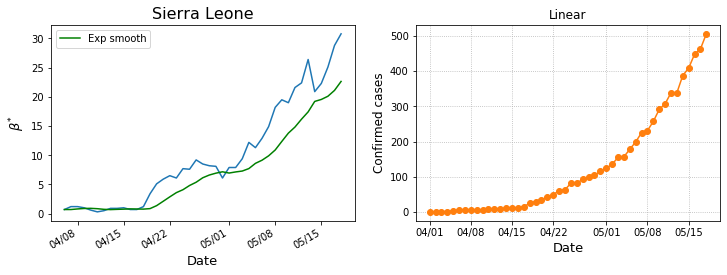

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


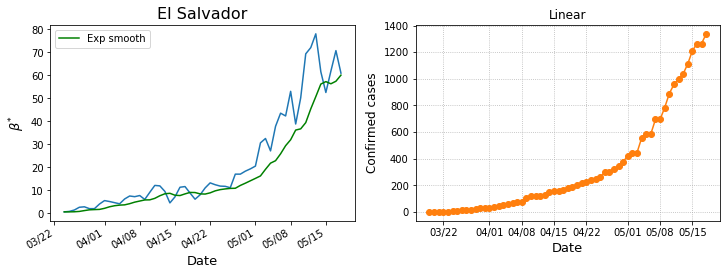

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


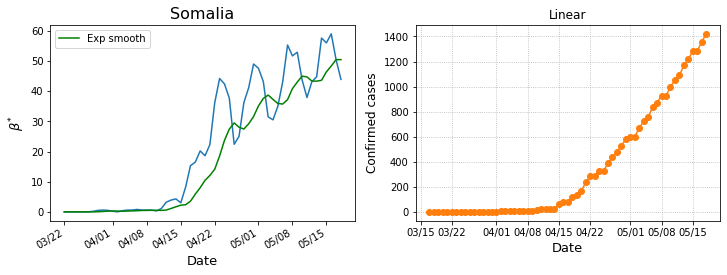

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


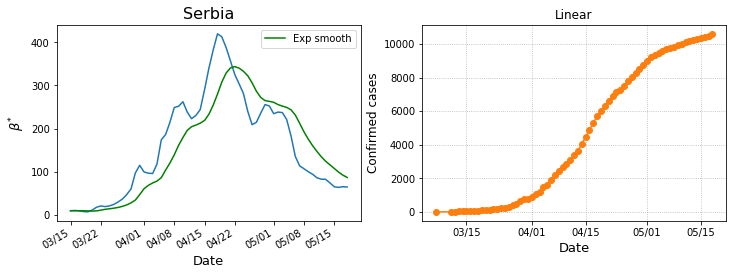

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


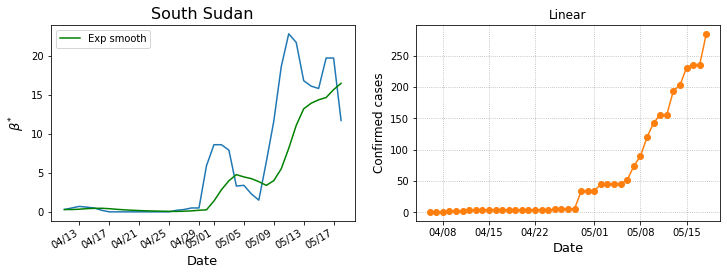

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


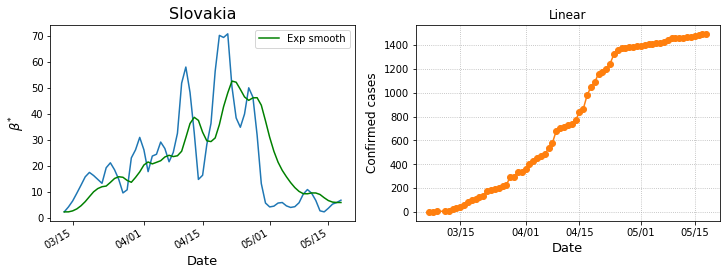

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


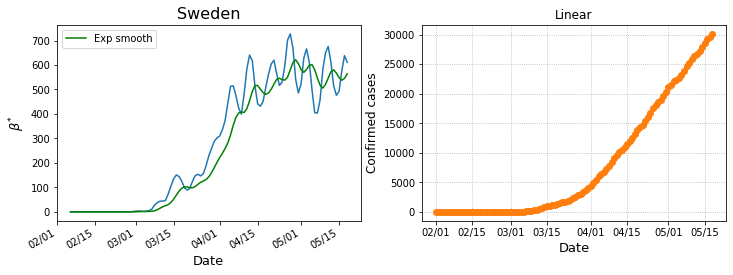

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


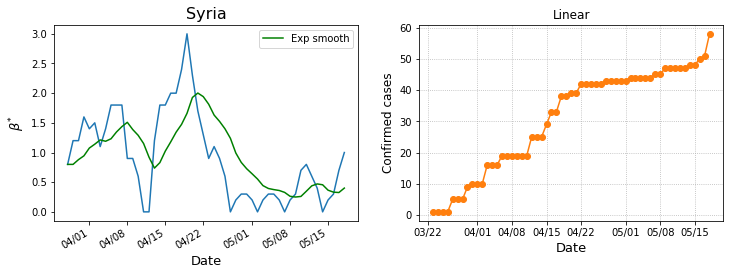

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


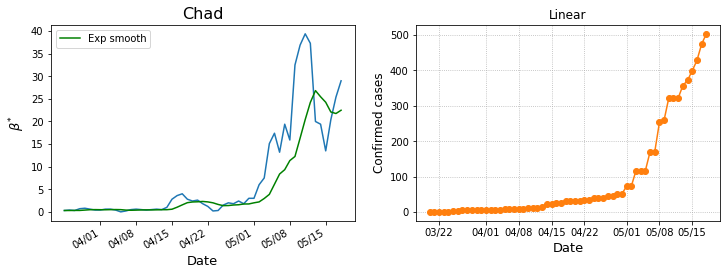

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


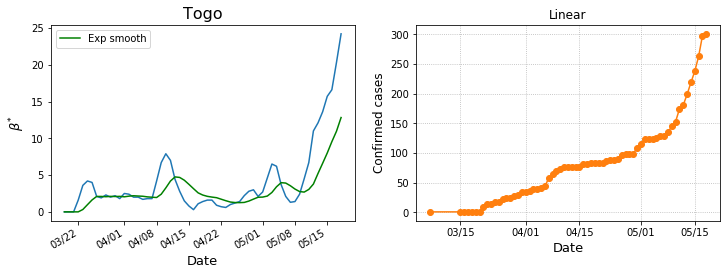

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


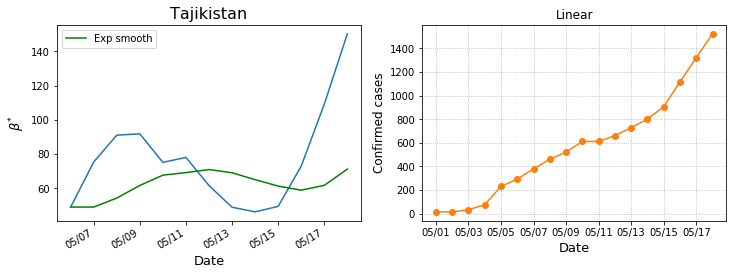

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


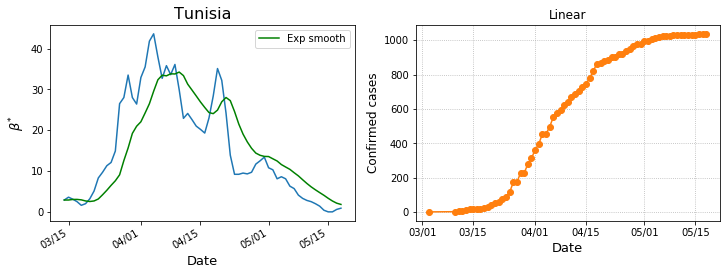

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


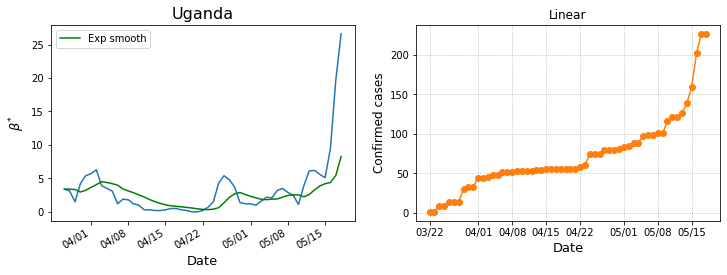

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


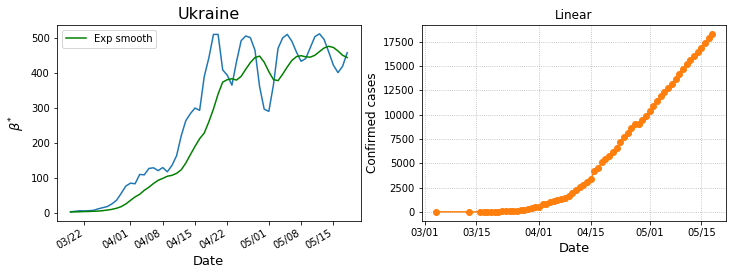

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


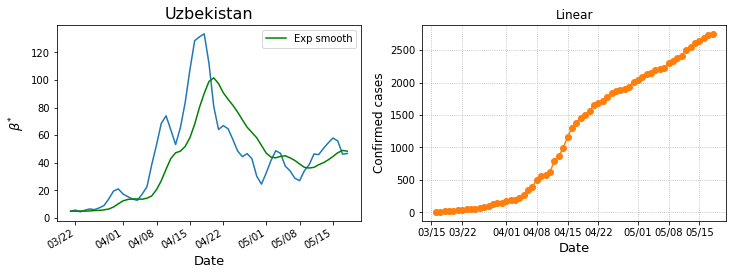

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


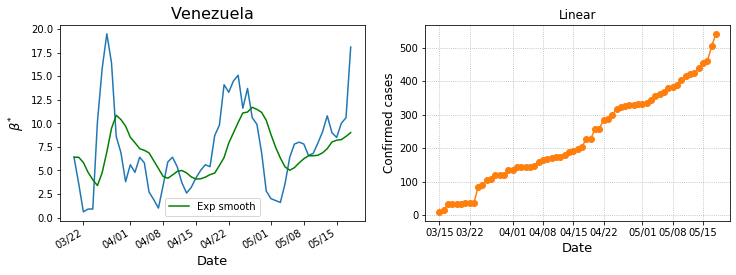

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


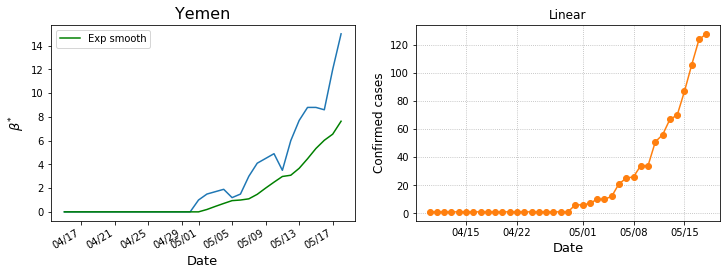

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


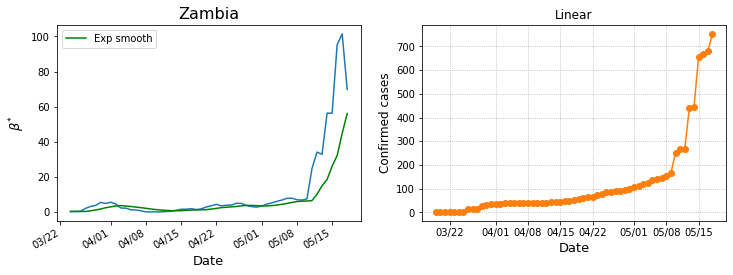

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


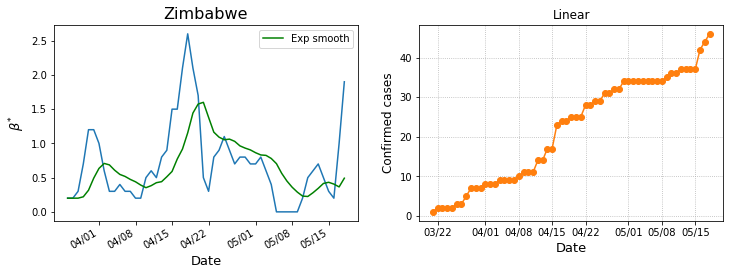

In [17]:
df_WORLD_ = pd.DataFrame(columns = df_WORLD.columns.values)
df_WORLD_['grad'] = ''
df_WORLD_['grad_smooth'] = ''
window = 5

#countries = ['Spain', 'Switzerland']


for country in countries:
    
    df = df_WORLD[ df_WORLD['location'] == country].set_index('date')
    df = df [ df['total_cases']  > 0]

    df.index = pd.to_datetime(df.index)
    
    X = np.arange(len(df['total_cases'])).reshape(-1, 1)
    y = np.array(df[['total_cases']]).reshape(len(df[['total_cases']])).reshape(-1, 1)
    idx = np.array(df.index)
    
    # Gradient calculation
    gradient = rolling_beta(X= X, y= y, idx= idx, window= window)
    # Exponential smooth
    fit_ExpS = SimpleExpSmoothing(gradient).fit(smoothing_level= 0.2, optimized= False)
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize= (12, 4))
    
    # We only look to the last third of gradients
    begin = 2*int(len(gradient) / 3)
    end = len(gradient)
        
    axes[0].plot(gradient)
    axes[0].set_title(country, fontsize= 16)
    axes[0].set_ylabel('$\\beta^{*}$', fontsize= 13)
    axes[0].set_xlabel('Date', fontsize= 13)
    axes[0].grid(linestyle=':')
    fit_ExpS.fittedvalues.plot(ax= axes[0], color='green', label= 'Exp smooth')
    axes[0].legend()
   
    
    axes[1].plot(df[['total_cases']], 'o-', color= 'C1')
    axes[1].set_ylabel('Confirmed cases', fontsize= 12)
    axes[1].set_xlabel('Date', fontsize= 13)
    axes[1].grid(linestyle=':')
    axes[1].set_title('Linear', fontsize= 12)
    

    # Define the date format
    date_form = DateFormatter("%m/%d")
    axes[0].xaxis.set_major_formatter(date_form)
    axes[1].xaxis.set_major_formatter(date_form)
    
    #fig.autofmt_xdate(rotation= 45)
    plt.show()
    
    # Keeping the values in a Data Frame
    df['grad'] = gradient[begin: end]
    df['grad_smooth'] = fit_ExpS.fittedvalues[begin: end]
    #df = df.reset_index()
    df_WORLD_ = pd.concat([df_WORLD_, df.reset_index()], ignore_index=True)

In [18]:
df_WORLD_['grad_smooth_NORM'] = df_WORLD_['grad_smooth'] / df_WORLD_['total_cases']

In [19]:
df_WORLD_

iso_code     location       date total_cases new_cases total_deaths  \
0         AFG  Afghanistan 2020-02-25           1         1            0   
1         AFG  Afghanistan 2020-02-26           1         0            0   
2         AFG  Afghanistan 2020-02-27           1         0            0   
3         AFG  Afghanistan 2020-02-28           1         0            0   
4         AFG  Afghanistan 2020-02-29           1         0            0   
...       ...          ...        ...         ...       ...          ...   
6257      ZWE     Zimbabwe 2020-05-14          37         0            4   
6258      ZWE     Zimbabwe 2020-05-15          37         0            4   
6259      ZWE     Zimbabwe 2020-05-16          42         5            4   
6260      ZWE     Zimbabwe 2020-05-17          44         2            4   
6261      ZWE     Zimbabwe 2020-05-18          46         2            4   

     new_deaths  total_cases_per_million  new_cases_per_million  \
0             0                    0.026                  0.026   
1             0                    0.026                  0.000   
2             0                    0.026                  0.000   
3             0                    0.026                  0.000   
4             0                    0.026                  0.000   
...         ...                      ...                    ...   
6257          0                    2.489                  0.000   
6258          0                    2.489                  0.000   
6259          0                    2.826                  0.336   
6260          0                    2.960                  0.135   
6261          0                    3.095                  0.135   

      total_deaths_per_million  ...  extreme_poverty  cvd_death_rate  \
0                        0.000  ...              NaN         597.029   
1                        0.000  ...              NaN         597.029   
2                        0.000  ...              NaN         597.029   
3                        0.000  ...              NaN         597.029   
4                        0.000  ...              NaN         597.029   
...                        ...  ...              ...             ...   
6257                     0.269  ...             21.4         307.846   
6258                     0.269  ...             21.4         307.846   
6259                     0.269  ...             21.4         307.846   
6260                     0.269  ...             21.4         307.846   
6261                     0.269  ...             21.4         307.846   

      diabetes_prevalence  female_smokers  male_smokers  \
0                    9.59             NaN           NaN   
1                    9.59             NaN           NaN   
2                    9.59             NaN           NaN   
3                    9.59             NaN           NaN   
4                    9.59             NaN           NaN   
...                   ...             ...           ...   
6257                 1.82             1.6          30.7   
6258                 1.82             1.6          30.7   
6259                 1.82             1.6          30.7   
6260                 1.82             1.6          30.7   
6261                 1.82             1.6          30.7   

     handwashing_facilities  hospital_beds_per_100k  grad  grad_smooth  \
0                    37.746                     0.5   NaN          NaN   
1                    37.746                     0.5   NaN          NaN   
2                    37.746                     0.5   NaN          NaN   
3                    37.746                     0.5   NaN          NaN   
4                    37.746                     0.5   NaN          NaN   
...                     ...                     ...   ...          ...   
6257                 36.791                     1.7   0.5     0.414960   
6258                 36.791                     1.7   0.3     0.431968   
6259                 36.791                    

In [24]:
window = 5

In [34]:
df_WORLD_.to_pickle('results/dfs/grad_local_window_' +  str(window) + '_fit_until_' + fit_until + '.pkl') 

#df_WORLD_ = pd.read_pickle('results/dfs/grad_local_window_' +  str(window) + '_fit_until_' + fit_until + '.pkl')

#### Critical value $\beta_c$ for the gradient

In [28]:
beta_c = 0.005

In [31]:
df_WORLD_th = df_WORLD_[ (df_WORLD_['grad_smooth_NORM'] > 0.    ) &
                         (df_WORLD_['grad_smooth_NORM'] <= beta_c)]

In [32]:
df_WORLD_th[ df_WORLD_th['location'] == 'Switzerland']

iso_code     location       date total_cases new_cases total_deaths  \
1261      CHE  Switzerland 2020-05-07       29977        51         1504   
1262      CHE  Switzerland 2020-05-08       30043        66         1517   
1263      CHE  Switzerland 2020-05-09       30124        81         1525   
1264      CHE  Switzerland 2020-05-10       30168        44         1531   
1265      CHE  Switzerland 2020-05-11       30222        54         1537   
1266      CHE  Switzerland 2020-05-12       30261        39         1542   
1267      CHE  Switzerland 2020-05-13       30297        36         1560   
1268      CHE  Switzerland 2020-05-14       30330        33         1563   
1269      CHE  Switzerland 2020-05-15       30380        50         1588   
1270      CHE  Switzerland 2020-05-16       30431        51         1594   
1271      CHE  Switzerland 2020-05-17       30489        58         1601   
1272      CHE  Switzerland 2020-05-18       30504        15         1602   

     new_deaths  total_cases_per_million  new_cases_per_million  \
1261         22                 3463.700                  5.893   
1262         13                 3471.326                  7.626   
1263          8                 3480.685                  9.359   
1264          6                 3485.769                  5.084   
1265          6                 3492.009                  6.239   
1266          5                 3496.515                  4.506   
1267         18                 3500.674                  4.160   
1268          3                 3504.487                  3.813   
1269         25                 3510.265                  5.777   
1270          6                 3516.158                  5.893   
1271          7                 3522.859                  6.702   
1272          1                 3524.592                  1.733   

      total_deaths_per_million  ...  extreme_poverty  cvd_death_rate  \
1261                   173.780  ...              NaN          99.739   
1262                   175.282  ...              NaN          99.739   
1263                   176.207  ...              NaN          99.739   
1264                   176.900  ...              NaN          99.739   
1265                   177.593  ...              NaN          99.739   
1266                   178.171  ...              NaN          99.739   
1267                   180.251  ...              NaN          99.739   
1268                   180.597  ...              NaN          99.739   
1269                   183.486  ...              NaN          99.739   
1270                   184.179  ...              NaN          99.739   
1271                   184.988  ...              NaN          99.739   
1272                   185.103  ...              NaN          99.739   

      diabetes_prevalence  female_smokers  male_smokers  \
1261                 5.59            22.6          28.9   
1262                 5.59            22.6          28.9   
1263                 5.59            22.6          28.9   
1264                 5.59            22.6          28.9   
1265                 5.59            22.6          28.9   
1266                 5.59            22.6          28.9   
1267                 5.59            22.6          28.9   
1268                 5.59            22.6          28.9   
1269                 5.59            22.6          28.9   
1270                 5.59            22.6          28.9   
1271                 5.59            22.6          28.9   
1272                 5.59            22.6          28.9   

     handwashing_facilities  hospital_beds_per_100k  grad  grad_smooth  \
1261                    NaN                    4.53  77.2   148.808037   
1262                    NaN                    4.53  59.0   134.486430   
1263                    NaN                    4.53  52.1   119.389144   
1264                    NaN                    4.53  56.9   105.931315   
1265                    NaN                    4.53  63.1    96.12505

Countries which have achieved the threshold.

In [33]:
countries_th = df_WORLD_th['location'].unique()
countries_th

array(['Australia', 'Austria', 'Switzerland', 'Spain', 'Greece', 'Israel',
       'Cambodia', 'Laos', 'Libya', 'Norway', 'Papua New Guinea',
       'Slovakia', 'Tunisia'], dtype=object)

Now let's take a look on the `total_cases_per_million` on the last date available for those countries.

In [35]:
total_per_million_ = []


for country in countries_th:
    
    total_per_million = list(df_WORLD_[ df_WORLD_['location'] == country ]['total_cases_per_million'])
    
    total_per_million_.append(total_per_million[-1])
    
df_th = pd.DataFrame({'Country': countries_th, 'Total per million': total_per_million_})

df_th = df_th.set_index('Country')

df_th = df_th.sort_values(by= ['Total per million'])

Take a look at the $n_l$ largest `df_th['Totall per million']` values. Spain will be take as the worst case.

In [36]:
n_l = 15

df_th.nlargest(n_l, 'Total per million' )

Total per million
Country                            
Spain                      4948.157
Switzerland                3524.592
Israel                     1919.811
Austria                    1793.613
Norway                     1512.015
Australia                   276.276
Slovakia                    273.644
Greece                      271.897
Tunisia                      87.743
Libya                         9.460
Cambodia                      7.297
Laos                          2.611
Papua New Guinea              0.894

/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/rodrigo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


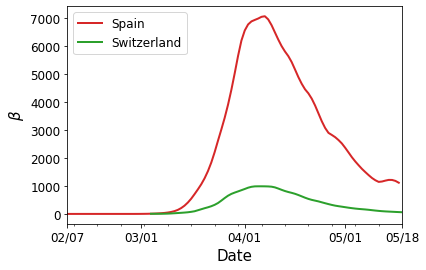

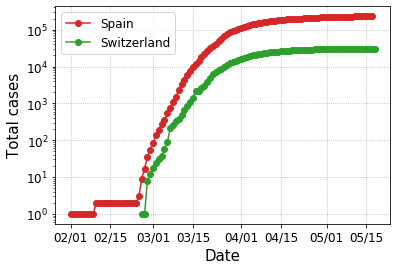

In [37]:
countries = ['Spain', 'Switzerland']
color = ['C3', 'C2']

j = 0

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
#fig.tight_layout()

for country in countries:
    
    df = df_WORLD[ df_WORLD['location'] == country].set_index('date')
    df = df [ df['total_cases']  > 0]
    
    df.index = pd.to_datetime(df.index)
    
    X = np.arange(len(df['total_cases'])).reshape(-1, 1)
    y = np.array(df[['total_cases']]).reshape(len(df[['total_cases']])).reshape(-1, 1)
    idx = np.array(df.index)
    
    #idx = df.index
    
    # Gradient calculation
    gradient = rolling_beta(X= X, y= y, idx= df.index.to_pydatetime(), window= 7)
    # Exponential smooth
    fit_ExpS = SimpleExpSmoothing(gradient).fit(smoothing_level= 0.2, optimized= False)
    
    # Plot
    #fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(10, 4))
    
    # We only look to the last third of gradients
    #begin = 2*int(len(gradient) / 3)
    #end = len(gradient)

    # Define the date format
    date_form = DateFormatter("%m/%d")
    
    

        
    #axes[0].plot(gradient)
    #axes[0].set_title(country, fontsize= 16, color= color[j])
    ax1.set_ylabel('$\\beta$', fontsize= 15)
    ax1.set_xlabel('Date', fontsize= 15)
    ax1.grid(linestyle=':')
    fit_ExpS.fittedvalues.plot(ax= ax1, color= color[j], label= countries[j], linewidth= 2.0, x = df.index)
    #ax1.set_xlim(['2020-03-04', '2020-05-19'])
    ax1.legend(fontsize= 12)
    ax1.tick_params(axis= 'x', labelsize= 12)
    ax1.tick_params(axis= 'y', labelsize= 12)
    ax1.xaxis.set_major_formatter(date_form)
    #ax1.set_xticks(rotation=90)
    #fig1.autofmt_xdate(rotation= 45)

   
    
    #axes[1].plot(df[['total_cases']], 'o-', color= 'C1')
    #axes[1].set_ylabel('Confirmed cases', fontsize= 12)
    #axes[1].set_xlabel('Date', fontsize= 13)
    #axes[1].grid(linestyle=':')
    #axes[1].set_title('Linear', fontsize= 12)
    
    ax2.plot(df[['total_cases']], 'o-', color= color[j], label= countries[j])
    ax2.set_ylabel('Total cases', fontsize= 15)
    ax2.set_xlabel('Date', fontsize= 15)
    ax2.tick_params(axis= 'x', labelsize= 12)
    ax2.tick_params(axis= 'y', labelsize= 12)
    ax2.grid(linestyle=':')
    #axes[1].set_title('Log', fontsize= 12)
    ax2.set_yscale('log')
    ax2.legend(fontsize= 12)
    ax2.xaxis.set_major_formatter(date_form)

    
    
    #plt.xticks(rotation=45)
    #fig.tight_layout()
    
    
    j = j+1
    #plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=None, hspace=None)

#fig1.savefig('results/figures/FIGURE_SCENARIOS_Spain_Switzerland_BETA_fit_until_05-17.pdf', bbox_inches='tight')
#fig1.show()
#fig2.savefig('results/figures/FIGURE_SCENARIOS_Spain_Switzerland_CASES_fit_until_05-17.pdf', bbox_inches='tight')
#fig2.show()
    
    # Keeping the values in a Data Frame
    #df['grad'] = gradient[begin: end]
    #df['grad_smooth'] = fit_ExpS.fittedvalues[begin: end]
    #df = df.reset_index()
    #df_WORLD_ = pd.concat([df_WORLD_, df.reset_index()], ignore_index=True)